In [1]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt;import seaborn as sns;sns.set()
from sklearn.preprocessing import StandardScaler;from sklearn.datasets import load_iris
iris=load_iris()


In [2]:

x_train=iris.data[:,[2,3]]
y_train=iris.target
x_train_std=StandardScaler().fit_transform(x_train)


# SVM para una tarea de clasificación lineal.

In [3]:
from sklearn.svm import SVC;from sklearn.model_selection import train_test_split
X_train_std,X_test_std,y_train,y_test=train_test_split(x_train_std,y_train,random_state=1,stratify=y_train,test_size=0.3)
modelo=SVC(C=0.5,kernel='linear',random_state=1)
modelo.fit(X_train_std,y_train)


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [4]:
y_predict=modelo.predict(X_test_std)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)


0.9777777777777777

In [5]:

def visualizar_fronteras(X,y,modelo,muestreo=0.02,test_set=None):
    from matplotlib.colors import ListedColormap
    marcadores=['^','v','o','^','v']
    colores=['red','yellow','black','yellow','gray']
    
    mapa_colores=ListedColormap(colores[:len(np.unique(y))])
    
    x_min_f1,x_max_f1=(X[:,0]).min()-1,(X[:,0]).max()+1  ##Característica Longitud_cépalo
    x_min_f2,x_max_f2=(X[:,1]).min()-1,(X[:,1]).max()+1###Característicaa longitud_pétalo
    
    vector1=np.arange(x_min_f1,x_max_f1,muestreo)
    vector2=np.arange(x_min_f2,x_max_f2,muestreo)
    
    x_meshgrid,y_meshgrid=np.meshgrid(vector1,vector2)
    
    Z=modelo.predict(np.array([x_meshgrid.ravel(),y_meshgrid.ravel()]).T)
    Z=Z.reshape(x_meshgrid.shape)
    plt.contourf(x_meshgrid,y_meshgrid,Z,alpha=0.2,cmap=mapa_colores)
    
    plt.xlim(x_min_f1,x_max_f1)
    plt.ylim(x_min_f2,x_max_f2)
    
    for i,index in enumerate(np.unique(y)):
        plt.scatter(x=X[y==index,0],y=X[y==index,1],marker=marcadores[i],alpha=0.8,edgecolor='black',label=index)
        plt.legend(loc='lower right')
    if test_set:
        x=X[test_set,:]
        plt.scatter(x[:,0],x[:,1],c='', edgecolor='black', alpha=1.0,linewidth=1, marker='o',
    s=100, label='conjunto_testeo')

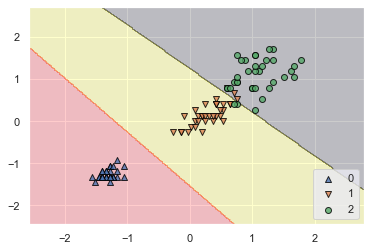

In [6]:
visualizar_fronteras(X_train_std,y_train,modelo=modelo)